#**Métricas de modelos PREDICTIVOS DISCRETOS**


# **1. PASOS PREVIOS**

#Librerías

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Módulo de separación de datos
from sklearn.model_selection import train_test_split
# Módulo de Matriz de confusión
from sklearn.metrics import confusion_matrix
# Módulo de Árbol de decisión
from sklearn.tree import DecisionTreeClassifier
# Módulo de Reporte de métricas
from sklearn.metrics import classification_report
# Métricas
from sklearn import metrics
# Curva ROC
from sklearn.metrics import RocCurveDisplay

# muestra el gráfico en el cuaderno (no utiliza una ventana)
%matplotlib inline

#Carga de datos

In [ ]:
# El objetivo del dataset, es identificación de sexo en en base a las medidas del resto de atributos
# sexo = f(peso, altura, pie, hombros, brazos, caderas, ojos)
df = pd.read_csv("datos_diabetes_norm.csv")
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,0.324324,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
1,0.567568,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,0.337838,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
3,0.391892,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.594595,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 520 non-null    float64
 1   Gender              520 non-null    float64
 2   Polyuria            520 non-null    float64
 3   Polydipsia          520 non-null    float64
 4   sudden weight loss  520 non-null    float64
 5   weakness            520 non-null    float64
 6   Polyphagia          520 non-null    float64
 7   Genital thrush      520 non-null    float64
 8   visual blurring     520 non-null    float64
 9   Itching             520 non-null    float64
 10  Irritability        520 non-null    float64
 11  delayed healing     520 non-null    float64
 12  partial paresis     520 non-null    float64
 13  muscle stiffness    520 non-null    float64
 14  Alopecia            520 non-null    float64
 15  Obesity             520 non-null    float64
 16  class   

# **2. APLICACION DEL MODELO PREDICTIVO**

#Separación de datos para entrenamiento y test

In [ ]:
X = df.drop(['class'], axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75)

In [ ]:
X.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,0.324324,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
1,0.567568,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.337838,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
3,0.391892,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.594595,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: class, dtype: float64

In [ ]:
X_train.head(5)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
291,0.189189,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
414,0.527027,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
133,0.000000,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33,0.513514,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
433,0.297297,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


#Entrenamiento con árbol de decisión

In [ ]:
modelo = DecisionTreeClassifier(criterion = 'gini', max_depth=5)
modelo.fit(X_train, y_train)
modelo.score(X_test, y_test)

0.9692307692307692

# **3. PREDICCIÓN DEL MODELO**

#Predicción de datos de test

In [ ]:
pred = modelo.predict(X_test)

# Resultados de predicción

In [ ]:
pred

array([1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1.,
       1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1.])

# Resultado de datos reales

In [ ]:
y_test

52     1.0
74     1.0
58     1.0
422    1.0
66     1.0
      ... 
39     1.0
216    0.0
303    1.0
436    1.0
90     1.0
Name: class, Length: 130, dtype: float64

# **4. CÁLCULO Y VISUALIZACIÓN DE MÉTRICAS**

#Obtención de métricas

In [ ]:
MatrizConfusion = confusion_matrix(y_test,pred)
Exactitud = metrics.accuracy_score(y_test,pred)
Precision = metrics.precision_score(y_test,pred)
Sensibilidad = metrics.recall_score(y_test,pred)
PuntuacionF1 = metrics.f1_score(y_test,pred)
Reporte = classification_report(y_test,pred)

# Matriz de confusión

In [ ]:
print('Matriz de confusión: ')
print(MatrizConfusion)

Matriz de confusión: 
[[45  0]
 [ 4 81]]


In [ ]:
print('Exactitud    : ', Exactitud)
print('Precisión    : ', Precision)
print('Sensibilidad : ', Sensibilidad)
print('Puntuación F1: ', PuntuacionF1)

Exactitud    :  0.9692307692307692
Precisión    :  1.0
Sensibilidad :  0.9529411764705882
Puntuación F1:  0.9759036144578312


In [ ]:
print('Reporte de métricas: ')
print(Reporte)

Reporte de métricas: 
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        45
         1.0       1.00      0.95      0.98        85

    accuracy                           0.97       130
   macro avg       0.96      0.98      0.97       130
weighted avg       0.97      0.97      0.97       130



#Curva ROC

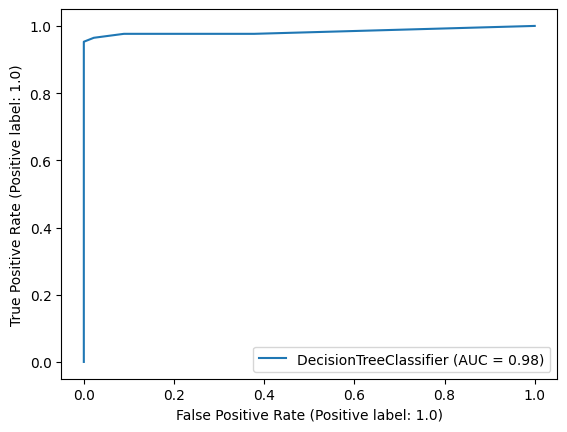

In [ ]:
RocCurveDisplay.from_estimator(modelo, X_test, y_test)